In [51]:
%pip install -U scikit-learn matplotlib pandas seaborn


Note: you may need to restart the kernel to use updated packages.


In [52]:
from sklearn.ensemble  import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
 
train = pd.read_csv('./date/X_train.csv')
y_train = pd.read_csv('./date/y_train.csv').values.ravel()
test = pd.read_csv('./date/X_test.csv')
y_test = pd.read_csv('./date/y_test.csv').values.ravel()
initial_data = pd.read_csv('./date/credit_score_dataset.csv')

Mean Squared Error: 2115.23


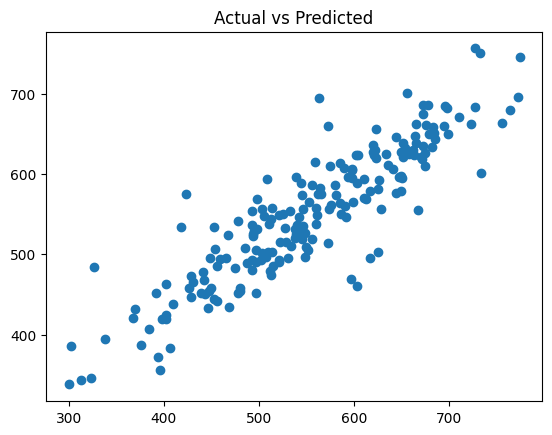

In [64]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(train, y_train)
y_pred = rf.predict(test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
plt.scatter(y_test, y_pred)
plt.title('Actual vs Predicted')
plt.savefig('./date/grafice/rf.png')

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


# Identifică coloanele








In [55]:
numeric_cols = train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = train.select_dtypes(include=['object']).columns.tolist()

train.hist(bins=50, figsize=(20, 15), color='blue', edgecolor='black')
plt.suptitle('Distributia valorilor')
plt.savefig('./date/graficetrain_histogram.png')
plt.close()

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.countplot(data=initial_data, x="MaritalStatus", ax=axes[0])
axes[0].set_title("Marital Status")

sns.countplot(data=initial_data, x="CreditHistory", ax=axes[1])
axes[1].set_title("Credit History")

plt.tight_layout()
plt.savefig('./date/grafice/Categoricals_MaritalStatus_CreditHistory.png')
plt.close()

In [56]:
# Detect outliers using the IQR method
outlier_counts = {}
for col in numeric_cols:
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = train[(train[col] < Q1 - 1.5 * IQR) | (train[col] > Q3 + 1.5 * IQR)]
    outlier_counts[col] = len(outliers)


In [57]:
plt.figure(figsize=(10, 6))
correlation_matrix = train.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.savefig('./date/grafice/corr_matrix.png')
plt.close()

In [58]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    200 non-null    float64
 1   Dependents             200 non-null    float64
 2   Income                 200 non-null    float64
 3   LoanAmount             200 non-null    float64
 4   CurrentBalance         200 non-null    float64
 5   PreviousBalance        200 non-null    float64
 6   Period                 200 non-null    float64
 7   CreditHistory_Bad      200 non-null    float64
 8   CreditHistory_Good     200 non-null    float64
 9   MaritalStatus_Married  200 non-null    float64
 10  MaritalStatus_Single   200 non-null    float64
dtypes: float64(11)
memory usage: 17.3 KB


In [59]:
fig, axes = plt.subplots(2, 3, figsize=(12, 4))
axes = axes.flatten()
cnt = 0
for  col in ["Income", "Age", "LoanAmount", "CurrentBalance", "PreviousBalance", "Period"]:
    axes[cnt].scatter(test[col], y_test, alpha=0.5)
    axes[cnt].set_title(f'{col} vs CreditScore')
    axes[cnt].set_xlabel(col)
    axes[cnt].set_ylabel('y_test')
    cnt += 1
plt.tight_layout()
plt.savefig(f'./date/grafice/scatter.png')
plt.close()



fig, axes = plt.subplots(1, 4, figsize=(12, 4))

axes = axes.flatten()

for idx, col in enumerate(["MaritalStatus_Married", "MaritalStatus_Single", "CreditHistory_Good", "CreditHistory_Bad"]):
    sns.violinplot(data=test, x=col, y=y_test, ax=axes[idx])
    axes[idx].set_title(f'{col} vs y_test')
plt.tight_layout()
plt.savefig('./date/grafice/violin_plots.png')
plt.close()